<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
Accuracy: 0.7886178861788617

Classification Report:
               precision    recall  f1-score   support

   

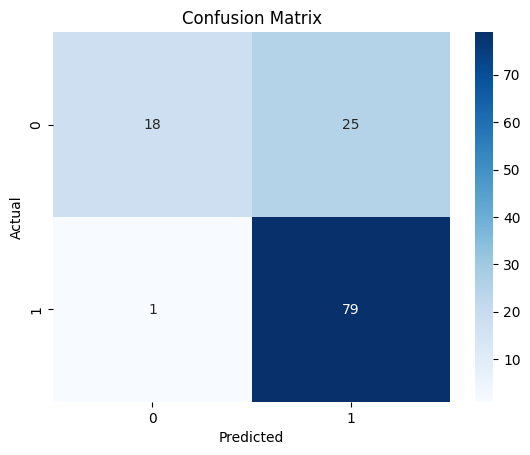

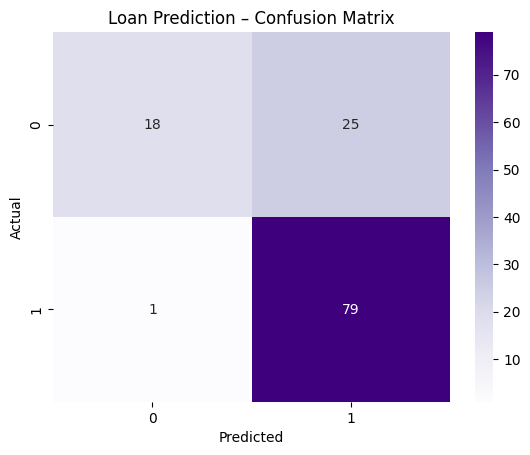

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('loan_data.csv')
df.head()
# Check for nulls and data types
df.info()

# Target column distribution
df['Loan_Status'].value_counts()
# Fill missing categorical values with mode
for col in ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History']:
    df.fillna({col: df[col].mode()[0]}, inplace=True)

# Fill missing numerical values with median
df.fillna({'LoanAmount': df['LoanAmount'].median()}, inplace=True)
df.fillna({'Loan_Amount_Term': df['Loan_Amount_Term'].mode()[0]}, inplace=True)

# Drop Loan_ID since it's not useful
df.drop(['Loan_ID'], axis=1, inplace=True)
from sklearn.preprocessing import LabelEncoder

cat_cols = ['Gender', 'Married', 'Education', 'Self_Employed', 
            'Property_Area', 'Loan_Status', 'Dependents']

le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])
from sklearn.model_selection import train_test_split

# Define input and output
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Loan Prediction – Confusion Matrix")
plt.show()
